(sec-more-qubits)=
# More qubits

Two qubits are too few for useful quantum computation and we need many more. In this section, we consider $n$ qubits where $n>2$.  Each qubit is in $\mathbb{C}^2$ and thus  ther system of $n$ qubits is in $2^n$ dimensional Hilbert space $\mathbb{C}^2 \otimes \cdots \otimes \mathbb{C}^2$, which spanned by $2^n$ basis vectors.


(ssec-notations)=
## Notation

In this book, we write the computational basis of $n$ qubits as

$$
|q_{n-1}\, q_{n-2}\, \cdots\, q_1\, q_0\rangle \equiv |q_{n-1}\rangle \otimes |q_{n-2}\rangle \otimes \cdots \otimes |q_1\rangle \otimes |q_0\rangle
$$

Notice that the qubits are ordered from the right to the left.  For example, $|01011\rangle$ is a computational basis ket for five qubits representing $|0\rangle \otimes |1\rangle \otimes |0 \rangle \otimes |1\rangle \otimes |1\rangle$. 

For large $n$, the expression becomes very long. We use a shorthand expression or an index based on integers in classical binary strings:

$$
|j\rangle_n = |j_{n-1}\, j_{n-2}\, \cdots\, j_1\, j_0\rangle
$$

where $j_k \in \{0,1\}$ and

$$
j = 2^{n-1} j_{n-1} + 2^{n-2} j_{n-2} + \cdots + 2 j_1 + j_0 = \sum_{k=0}^{n-1} 2^k j_k.
$$

For $n=3$, we have eight basis vectors

$$
\begin{align}
&|0\rangle_3 = |000\rangle, && |1\rangle_3 = |001\rangle, &&& |2\rangle_3 = |010\rangle, &&&&|3\rangle_3 = |011\rangle\\
&|4\rangle_3 = |100\rangle, && |5\rangle_3 = |101\rangle, &&& |6\rangle_3 = |110\rangle, &&&&|7\rangle_3 = |111\rangle
\end{align}
$$


---
**Exercise**  For the system of 5 qubits, find what computational basis set $|13\rangle_5$ means.

## Entanglement

Recall the system is entangled if the state vector of a composite system cannot be written as a product of individual state vectors.  For two qubits, this definition is clear.  For three qubits, what does "product" state mean?  Do all three qubits have to be separated like $|q_2\rangle \otimes |q_1\rangle \otimes |q_0\rangle$? If $q_1$ and $q_2$ are entangled but not with $q_0$ the state vector can be written as

$$
|\text{entangled}\rangle_2 \otimes |q_0\rangle
$$

Is this a product state?  In one sense this is a product state and thus the whole system is not entangled.  However, a part of the whole system is entangled.   When the state vector of a whole system cannot be written as any form of product state, we say that the whole system is entangled.  For example, the state known as the [*GHZ* state](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state):

$$
|\text{GHZ}\rangle = \frac{1}{\sqrt{2}}\left(|000\rangle + |111\rangle\right) 
$$

cannot be written as any form of product state.  We say that the state is maximally entangled. To understand the effect of entanglement, qubits $q_0$, $q_1$ and $q_2$ are delivered to Alice, Bob, and Charlie, respectively.  Before any measurement, all of them have a equal chance to get $|0\rangle$ or $|1\rangle$.  Alice measures her qubit before others and get $|1\rangle$.  Immediately, the state collapse to $|111\rangle$ and she knows that Bob's and Charlie's qubits are both in $|1\rangle$.  Now, they have no chance to get $|0\rangle$ (but they don't know it.)  This happens even when they are far apart.  In one sense, this entanglement is strong because measurement of a single qubit removes the uncertainty in two others.  On the other hand, the entanglement is not robust since the measurement of a single qubit destroys the entanglement entirely. The GHZ state is used in various quantum algorithms including [Quantum Byzantine agreement](https://en.wikipedia.org/wiki/Quantum_Byzantine_agreement).

There is another maximally entangled state known as the [*W* state](https://en.wikipedia.org/wiki/W_state)

$$
|\text{W}\rangle = \frac{1}{\sqrt{3}} \left(|001\rangle + |010\rangle + |100\rangle\right).
$$

Again, Alice measures her qubit first but gets $|0\rangle$ this time.  The state collapses to $\frac{1}{\sqrt{2}}\left(01\rangle + |10\rangle\right) \otimes |0\rangle$.
This entanglement is a little bit more robust than the GHZ state since even after Alice measured, entanglement between Bob and Charie remains.  

Finding all maximally entangled states for bigger composite systems is not a trivial task. We will not discuss it here.

**Quiskit example: creation of GHZ state**

The GHZ state can be created essentially in the same way as the Bell state $|\Phi^{+}\rangle$.  The following circuit creates it using `H` and `CX` gates.

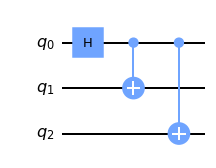

In [1]:
from qiskit import *

qr=QuantumRegister(3,'q')
qc=QuantumCircuit(qr)

qc.h(0)
qc.cx(0,1)
qc.cx(0,2)

qc.draw('mpl')

In [15]:
from qiskit.quantum_info import Statevector

psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

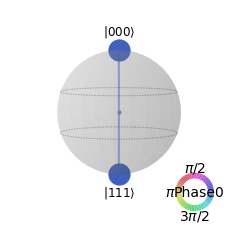

In [16]:
from qiskit.visualization import plot_state_qsphere
# it's an entangled state.  Use qsphere.
plot_state_qsphere(psi,figsize=(4,4))

Generating W state is a little bit more complicated. The following circuit
creates the W state.

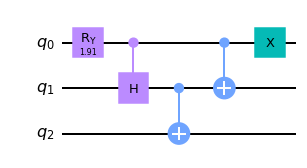

In [2]:
from qiskit import *
import numpy  as np

qr=QuantumRegister(3,'q')
qc=QuantumCircuit(qr)

theta = 2*np.arccos(1./np.sqrt(3))

qc.ry(theta,0)
qc.ch(0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.x(0)

qc.draw('mpl')


In [24]:
from qiskit.quantum_info import Statevector

psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

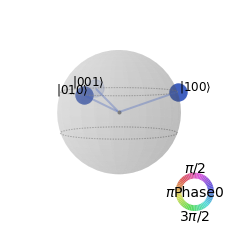

In [25]:
plot_state_qsphere(psi,figsize=(4,4))